# Data_Analysis

## Import

In [15]:
# Utility
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'

In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

## Data Load

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv', index_col = 0)

In [19]:
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


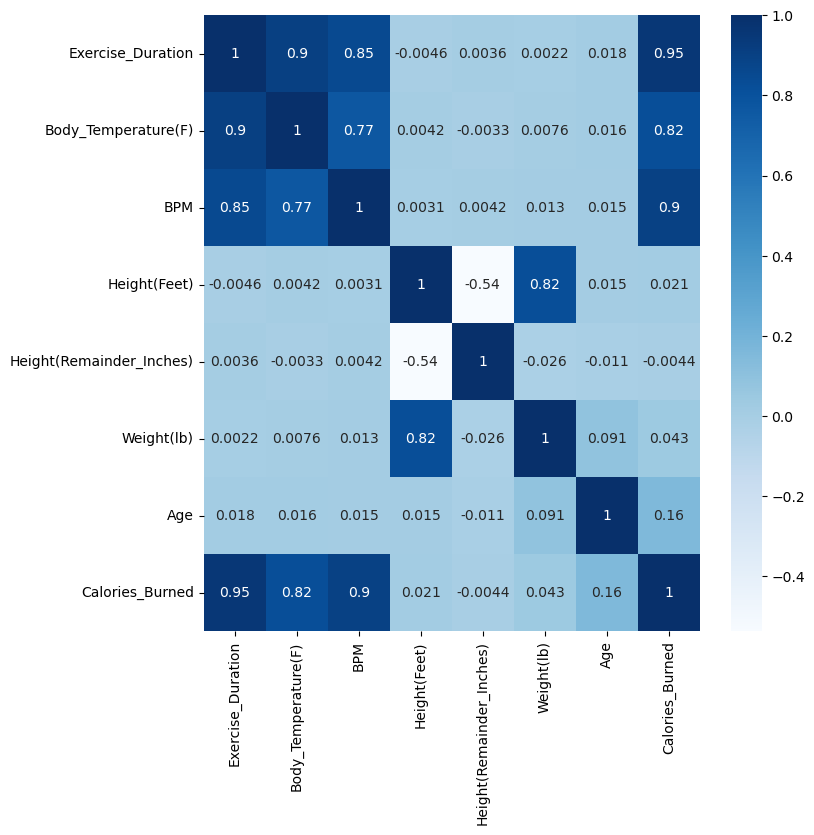

In [18]:
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

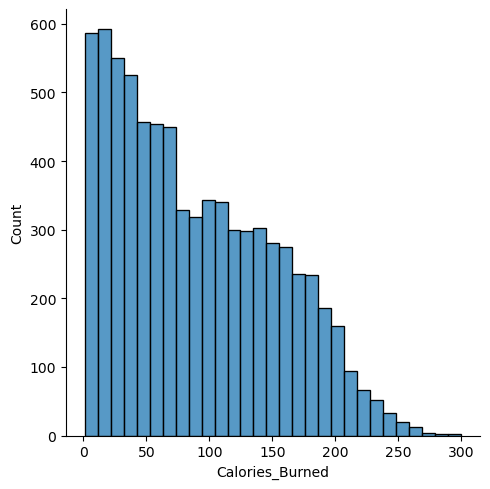

In [20]:
sns.displot(train['Calories_Burned'])
plt.show()

In [21]:
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [22]:
test.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

In [24]:
train.corr()['Calories_Burned'].sort_values()

Height(Remainder_Inches)   -0.004381
Height(Feet)                0.020780
Weight(lb)                  0.042568
Age                         0.159624
Body_Temperature(F)         0.824379
BPM                         0.899900
Exercise_Duration           0.954783
Calories_Burned             1.000000
Name: Calories_Burned, dtype: float64

In [28]:
for column in train.columns[1:]:
    print(column)

Exercise_Duration
Body_Temperature(F)
BPM
Height(Feet)
Height(Remainder_Inches)
Weight(lb)
Weight_Status
Gender
Age
Calories_Burned


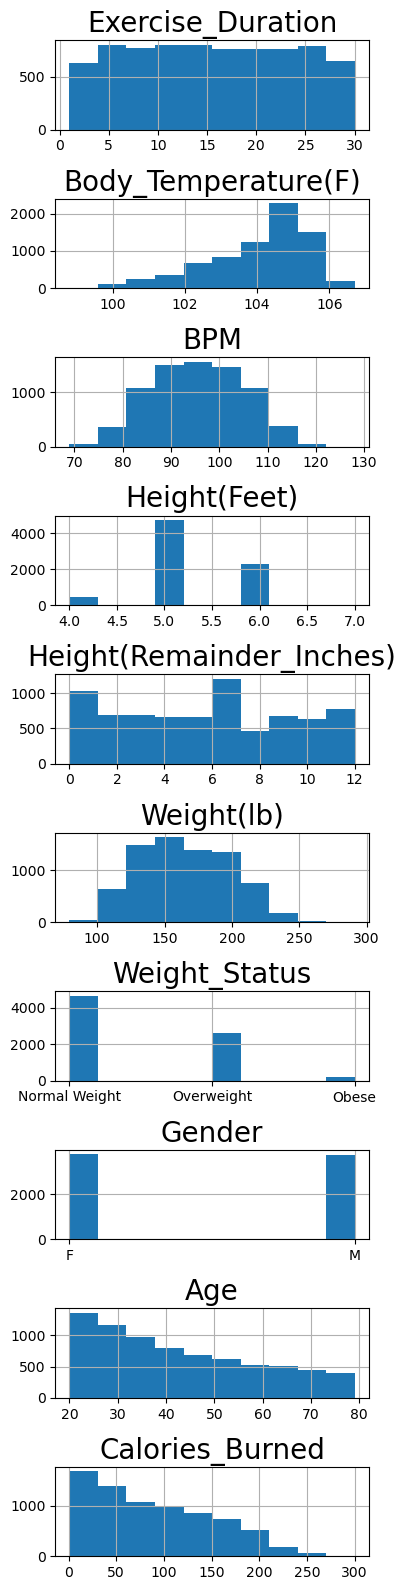

In [35]:
cnt = len(train.columns[1:])
fig, axes = plt.subplots(cnt,1,figsize=(4,16))

for ax_idx, ax in enumerate(axes.flat):
    ax.hist(train[train.columns[1+ax_idx]])
    ax.set_title(train.columns[1+ax_idx],
                 fontsize=20)
    ax.grid()
fig.tight_layout()

In [72]:
# 범주형 변수와 수치형 변수를 분리

cat_features = train.select_dtypes(include=['object']).columns.to_list()
num_features = train.select_dtypes(exclude=['object']).columns.to_list()

In [76]:
cat_features = cat_features[1:]

In [74]:
num_features

['Exercise_Duration',
 'Body_Temperature(F)',
 'BPM',
 'Height(Feet)',
 'Height(Remainder_Inches)',
 'Weight(lb)',
 'Age',
 'Calories_Burned']

In [94]:
cat_features

['Weight_Status', 'Gender']

In [107]:
fig = px.bar(train.groupby(['Exercise_Duration','Gender'])[['Calories_Burned']].mean().reset_index(),
         x='Exercise_Duration', y='Calories_Burned', color='Gender',
         title='Average Calories_Burned per Duration',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Gender=F<br>Exercise_Duration=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '9e0ca13b-08ef-4c0d-a825-efc32a3e1ff4',
              'x': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
                          15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
                          29., 30.]),
              'xaxis': 'x',
              'y': array([  3.69642857,   7.52631579,  11.63043478,  15.84732824,  20.44615385,
                           25.46323529,  29.98412698,  35.48965517,  40.91596639,  47.26666667,
             

In [106]:
fig = px.bar(train.groupby(['Exercise_Duration','Weight_Status'])[['Calories_Burned']].mean().reset_index(),
         x='Exercise_Duration', y='Calories_Burned', color='Weight_Status',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Weight_Status=Normal Weight<br' ... 'ies_Burned=%{y}<extra></extra>'),
              'legendgroup': 'Normal Weight',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'Normal Weight',
              'offsetgroup': 'Normal Weight',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '32eb1587-7e30-4699-af8a-75d27ae537da',
              'x': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
                          15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
                          29., 30.]),
              'xaxis': 'x',
              'y': array([  3.36986301,   7.07784431,  10.80357143,  15.1097561 ,  19.14465409,
                           24.12727273,  28.33098592,  33.49122807,  38.17751

In [105]:
fig = px.bar(train.groupby(['Age','Gender'])[['Calories_Burned']].mean().reset_index(),
         x='Age', y='Calories_Burned', color='Gender',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Gender=F<br>Age=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '0b57176e-bdfa-42ea-b3d8-c29bd50347fc',
              'x': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
                          38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
                          56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
                          74, 75, 76, 77, 78, 79]),
              'xaxis': 'x',
              'y': array([ 80.25619835,  77.94214876,  90.04273504,  75.91954023,  83.61904762,
       

In [104]:
fig = px.bar(train.groupby(['Age','Weight_Status'])[['Calories_Burned']].mean().reset_index(),
         x='Age', y='Calories_Burned', color='Weight_Status',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Weight_Status=Normal Weight<br>Age=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'Normal Weight',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'Normal Weight',
              'offsetgroup': 'Normal Weight',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': 'c05f602b-56de-4b4c-8ba7-2441bcb7d645',
              'x': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
                          38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
                          56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
                          74, 75, 76, 77, 78, 79]),
              'xaxis': 'x',
              'y': array([ 71.68648649,  75.1758

In [108]:
fig = px.bar(train.groupby(['BPM','Gender'])[['Calories_Burned']].mean().reset_index(),
         x='BPM', y='Calories_Burned', color='Gender',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Gender=M<br>BPM=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'M',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'M',
              'offsetgroup': 'M',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '1afbd80b-391b-49a7-a6fb-0054b4b2f98a',
              'x': array([ 69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
                           81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
                           93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
                          105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
                          117., 118., 119., 120., 121., 122., 125., 128.]),
         

In [109]:
fig = px.bar(train.groupby(['BPM','Weight_Status'])[['Calories_Burned']].mean().reset_index(),
         x='BPM', y='Calories_Burned', color='Weight_Status',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Weight_Status=Normal Weight<br>BPM=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'Normal Weight',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'Normal Weight',
              'offsetgroup': 'Normal Weight',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': 'af4dc4af-306b-4271-a59b-5bb81ed6dc43',
              'x': array([ 69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
                           81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
                           93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
                          105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
                          117.

In [112]:
fig = px.bar(train.groupby(['Body_Temperature(F)','Gender'])[['Calories_Burned']].mean().reset_index(),
         x='Body_Temperature(F)', y='Calories_Burned', color='Gender',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Gender=F<br>Body_Temperature(F)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': 'c317a365-e4d2-4e2a-bf95-4e7c5223083e',
              'x': array([ 98.8,  99. ,  99.1,  99.3,  99.5,  99.7,  99.9, 100. , 100.2, 100.4,
                          100.6, 100.8, 100.9, 101.1, 101.3, 101.5, 101.7, 101.8, 102. , 102.2,
                          102.4, 102.6, 102.7, 102.9, 103.1, 103.3, 103.5, 103.6, 103.8, 104. ,
                          104.2, 104.4, 104.5, 104.7, 104.9, 105.1, 105.3, 105.4, 105.6, 105.8,
                          106. , 106.2, 106.3, 106.5]),
              'xaxis'

In [113]:
fig = px.bar(train.groupby(['Body_Temperature(F)','Weight_Status'])[['Calories_Burned']].mean().reset_index(),
         x='Body_Temperature(F)', y='Calories_Burned', color='Weight_Status',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Weight_Status=Normal Weight<br' ... 'ies_Burned=%{y}<extra></extra>'),
              'legendgroup': 'Normal Weight',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'Normal Weight',
              'offsetgroup': 'Normal Weight',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': 'e89394b9-d5a1-4cab-b606-1b8f23abb6ce',
              'x': array([ 98.8,  99. ,  99.3,  99.5,  99.7,  99.9, 100. , 100.2, 100.4, 100.6,
                          100.8, 100.9, 101.1, 101.3, 101.5, 101.7, 101.8, 102. , 102.2, 102.4,
                          102.6, 102.7, 102.9, 103.1, 103.3, 103.5, 103.6, 103.8, 104. , 104.2,
                          104.4, 104.5, 104.7, 104.9, 105.1, 105.3, 105.4, 105.6, 105.8, 106. ,
                          106.2, 106.3, 106.5])

In [114]:
fig = px.bar(train.groupby(['Height(Feet)','Gender'])[['Calories_Burned']].mean().reset_index(),
         x='Height(Feet)', y='Calories_Burned', color='Gender',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Gender=F<br>Height(Feet)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': 'ef4f43bd-782b-44e7-a161-91390d6444df',
              'x': array([4., 5., 6.]),
              'xaxis': 'x',
              'y': array([89.21460177, 87.67340493, 82.41059603]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Gender=M<br>Height(Feet)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'M',
              'marker': {'color': 'rgb(246, 207, 113)', 'pattern': {'shape': ''}},
              'name': 'M',
              'of

In [115]:
fig = px.bar(train.groupby(['Height(Feet)','Weight_Status'])[['Calories_Burned']].mean().reset_index(),
         x='Height(Feet)', y='Calories_Burned', color='Weight_Status',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Weight_Status=Normal Weight<br' ... 'ies_Burned=%{y}<extra></extra>'),
              'legendgroup': 'Normal Weight',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'Normal Weight',
              'offsetgroup': 'Normal Weight',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': 'c582036e-fc28-41e1-ac74-b19c3dcdfc40',
              'x': array([4., 5., 6., 7.]),
              'xaxis': 'x',
              'y': array([ 89.82885086,  86.47119041,  83.03407756, 185.5       ]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Weight_Status=Obese<br>Height(Feet)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'Obese',
              'marker': {'color': 'rgb(246, 207, 113)'

In [119]:
fig = px.bar(train.groupby(['Height(Remainder_Inches)','Gender'])[['Calories_Burned']].mean().reset_index(),
         x='Height(Remainder_Inches)', y='Calories_Burned', color='Gender',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Gender=F<br>Height(Remainder_Inches)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '4c9d8e00-ed18-41da-a549-1212ef48650b',
              'x': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
              'xaxis': 'x',
              'y': array([88.32374101, 90.97142857, 91.24028269, 89.02364066, 88.45364238,
                          89.07783019, 88.92542373, 82.99753695, 80.37959184, 81.55263158,
                          91.25609756, 89.08979592, 92.88461538]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'ho

In [120]:
fig = px.bar(train.groupby(['Height(Remainder_Inches)','Weight_Status'])[['Calories_Burned']].mean().reset_index(),
         x='Height(Remainder_Inches)', y='Calories_Burned', color='Weight_Status',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Weight_Status=Normal Weight<br' ... 'ies_Burned=%{y}<extra></extra>'),
              'legendgroup': 'Normal Weight',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'Normal Weight',
              'offsetgroup': 'Normal Weight',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '00126559-eda9-4ed3-81c3-28cae7bf378d',
              'x': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
              'xaxis': 'x',
              'y': array([83.63090129, 87.11111111, 89.79899497, 86.24449339, 89.56565657,
                          88.25950783, 87.90807799, 83.14569536, 76.78745645, 81.32444444,
                          90.43287671, 86.24842767, 90.3880597 ]),
              'yaxis': 'y'},
             {'alignmentgroup': 

In [121]:
fig = px.bar(train.groupby(['Weight(lb)','Gender'])[['Calories_Burned']].mean().reset_index(),
         x='Weight(lb)', y='Calories_Burned', color='Gender',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Gender=F<br>Weight(lb)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '4d76050f-2ec9-4e0a-a81c-ca4f77f249d6',
              'x': array([ 79.4,  83.8,  86. ,  88.2,  90.4,  92.6,  94.8,  97. ,  99.2, 101.4,
                          103.6, 105.8, 108. , 110.2, 112.4, 114.6, 116.8, 119. , 121.3, 123.5,
                          125.7, 127.9, 130.1, 132.3, 134.5, 136.7, 138.9, 141.1, 143.3, 145.5,
                          147.7, 149.9, 152.1, 154.3, 156.5, 158.7, 160.9, 163.1, 165.3, 167.6,
                          169.8, 172. , 174.2, 176.4, 178.6, 180.8, 183. , 185.2, 187.

In [122]:
fig = px.bar(train.groupby(['Weight(lb)','Weight_Status'])[['Calories_Burned']].mean().reset_index(),
         x='Weight(lb)', y='Calories_Burned', color='Weight_Status',
         title='미정',
         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Weight_Status=Normal Weight<br' ... 'ies_Burned=%{y}<extra></extra>'),
              'legendgroup': 'Normal Weight',
              'marker': {'color': 'rgb(102, 197, 204)', 'pattern': {'shape': ''}},
              'name': 'Normal Weight',
              'offsetgroup': 'Normal Weight',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'uid': '94822b48-c267-43e6-bed8-35fea4c223ad',
              'x': array([ 79.4,  83.8,  86. ,  88.2,  90.4,  92.6,  94.8,  97. ,  99.2, 101.4,
                          103.6, 105.8, 108. , 110.2, 112.4, 114.6, 116.8, 119. , 121.3, 123.5,
                          125.7, 127.9, 130.1, 132.3, 134.5, 136.7, 138.9, 141.1, 143.3, 145.5,
                          147.7, 149.9, 152.1, 154.3, 156.5, 158.7, 160.9, 163.1, 165.3, 167.6,
                          169.8, 172. , 174.2, 

In [123]:
fig = px.scatter(train, x='Weight(lb)', y='Calories_Burned', trendline='ols',
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 trendline_color_override='gold')
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'hovertemplate': 'Weight(lb)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': 'cc63825b-93a1-459b-b38b-eebc43f16140',
              'x': array([154.3, 224.9, 218.3, ..., 202.8, 167.6, 189.6]),
              'xaxis': 'x',
              'y': array([166.,  33.,  23., ...,  41.,  57.,  59.]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Calori' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'line': {'color': 'gold'},
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'ui

In [124]:
fig = px.scatter(train, x='Exercise_Duration', y='Calories_Burned', trendline='ols',
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 trendline_color_override='gold')
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'hovertemplate': 'Exercise_Duration=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': '9924e3a8-d83d-4a0f-af5b-0266c6e5546a',
              'x': array([26.,  7.,  7., ...,  8., 12., 16.]),
              'xaxis': 'x',
              'y': array([166.,  33.,  23., ...,  41.,  57.,  59.]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Calori' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'line': {'color': 'gold'},
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': '

In [125]:
fig = px.scatter(train, x='Body_Temperature(F)', y='Calories_Burned', trendline='ols',
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 trendline_color_override='gold')
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'hovertemplate': 'Body_Temperature(F)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': '38151580-01c4-4b84-8386-8774588e5519',
              'x': array([105.6, 103.3, 103.3, ..., 103.1, 104.4, 104.9]),
              'xaxis': 'x',
              'y': array([166.,  33.,  23., ...,  41.,  57.,  59.]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Calori' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'line': {'color': 'gold'},
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
        

In [126]:
fig = px.scatter(train, x='BPM', y='Calories_Burned', trendline='ols',
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 trendline_color_override='gold')
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'hovertemplate': 'BPM=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': '9dba0c82-e58c-4b07-a322-a3c11a4b905a',
              'x': array([107.,  88.,  86., ...,  90.,  97.,  91.]),
              'xaxis': 'x',
              'y': array([166.,  33.,  23., ...,  41.,  57.,  59.]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Calori' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'line': {'color': 'gold'},
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': 'f77b7a88

In [127]:
fig = px.scatter(train, x='Height(Feet)', y='Calories_Burned', trendline='ols',
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 trendline_color_override='gold')
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'hovertemplate': 'Height(Feet)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': '69a50aab-8054-4221-9889-9bc4df9599d8',
              'x': array([5., 6., 6., ..., 6., 5., 5.]),
              'xaxis': 'x',
              'y': array([166.,  33.,  23., ...,  41.,  57.,  59.]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Calori' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'line': {'color': 'gold'},
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': 'becaaf7b-1b

In [128]:
fig = px.scatter(train, x='Height(Remainder_Inches)', y='Calories_Burned', trendline='ols',
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 trendline_color_override='gold')
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'hovertemplate': 'Height(Remainder_Inches)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': '8e3497a3-dc37-47e3-9d34-dcf802695fba',
              'x': array([ 9.,  6.,  3., ...,  2.,  9., 12.]),
              'xaxis': 'x',
              'y': array([166.,  33.,  23., ...,  41.,  57.,  59.]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Calori' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'line': {'color': 'gold'},
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              '

In [129]:
fig = px.scatter(train, x='Weight(lb)', y='Calories_Burned', trendline='ols',
                 color_discrete_sequence=px.colors.qualitative.Pastel1,
                 trendline_color_override='gold')
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'hovertemplate': 'Weight(lb)=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': '8b90c85d-4fae-4601-aeb9-4773d6150cdb',
              'x': array([154.3, 224.9, 218.3, ..., 202.8, 167.6, 189.6]),
              'xaxis': 'x',
              'y': array([166.,  33.,  23., ...,  41.,  57.,  59.]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Calori' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'line': {'color': 'gold'},
              'marker': {'color': 'rgb(251,180,174)', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'ui

In [132]:
fig = px.box(train, x='Gender', y='Calories_Burned', color='Exercise_Duration',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Exercise_Duration=26.0<br>Gender=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '26.0',
              'marker': {'color': 'rgb(102, 197, 204)'},
              'name': '26.0',
              'notched': False,
              'offsetgroup': '26.0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'uid': 'caf56125-fc2a-4169-a7ac-9e79f4cc764e',
              'x': array(['F', 'M', 'M', ..., 'M', 'M', 'F'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([166., 164., 161., ..., 217., 192., 190.]),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Exercise_Duration=7.0<br>Gender=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '7.0',
              'marker': {'color': 'rgb(246, 

In [134]:
fig = px.box(train, x='Gender', y='Calories_Burned', color='Height(Feet)',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig_eda = go.FigureWidget(fig)
fig_eda

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Height(Feet)=5.0<br>Gender=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '5.0',
              'marker': {'color': 'rgb(102, 197, 204)'},
              'name': '5.0',
              'notched': False,
              'offsetgroup': '5.0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'uid': '5623cb08-103f-4c2a-91f8-6e6092a77f51',
              'x': array(['F', 'F', 'M', ..., 'F', 'M', 'M'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([166.,  91.,  32., ..., 114.,  57.,  59.]),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Height(Feet)=6.0<br>Gender=%{x}<br>Calories_Burned=%{y}<extra></extra>',
              'legendgroup': '6.0',
              'marker': {'color': 'rgb(246, 207, 113)'},
 

In [135]:
fig = px.box(train, x='Gender', y='Calories_Burned', color='Height(Feet)',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [103]:
num_features

['Exercise_Duration',
 'Body_Temperature(F)',
 'BPM',
 'Height(Feet)',
 'Height(Remainder_Inches)',
 'Weight(lb)',
 'Age',
 'Calories_Burned']